In [ ]:
!ls /kaggle/input/food-101/food-101/food-101/images

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image


def display_images(food_category, num_images=5):
    dataset_path = "/kaggle/input/food-101/food-101/food-101/"
    category_path = os.path.join(dataset_path, "images", food_category)
    images = os.listdir(category_path)

    # Display the images
    plt.figure(figsize=(20, 10))
    for i in range(min(num_images, len(images))):
        img_path = os.path.join(category_path, images[i])
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(food_category)
    plt.show()

In [ ]:
display_images("samosa", num_images=5)

In [ ]:
!ls /kaggle/input/food-101/food-101/food-101/meta

In [ ]:
with open("/kaggle/input/food-101/food-101/food-101/README.txt") as f:
    print(f.read())

In [ ]:
with open("/kaggle/input/food-101/food-101/food-101/license_agreement.txt") as f:
    print(f.read())

In [ ]:
dirs = os.listdir("/kaggle/input/food-101/food-101/food-101/meta")
print(dirs)
with open(f"/kaggle/input/food-101/food-101/food-101/meta/{dirs[0]}") as f:
    print(f.read(100))

In [ ]:
!ls /kaggle/input/food-101/food-101/food-101/images/apple_pie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil

import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D

2024-07-15 09:40:52.871135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 09:40:52.871264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 09:40:53.029312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!ls /kaggle/input/food-101/food-101/food-101/meta/train.txt

/kaggle/input/food-101/food-101/food-101/meta/train.txt


In [3]:
Dir = "/kaggle/input/food-101/food-101/food-101/images/"

In [4]:
trainImages = []
trainLabels = []

with open("/kaggle/input/food-101/food-101/food-101/meta/train.txt") as f:
    k = [i.strip() for i in f.readlines()]
    for i in k:
        x = i.split("/")
        trainImages.append(Dir + i + ".jpg")
        trainLabels.append(x[0])

In [5]:
print(len(trainImages))
print(len(trainLabels))

75750
75750


In [6]:
trainIseries = pd.Series(trainImages, name="trainImages")
trainLseries = pd.Series(trainLabels, name="trainLabels")
train_food_data = pd.concat([trainIseries, trainLseries], axis=1)
train_food_df = pd.DataFrame(train_food_data)

In [7]:
train_food_df.head()

,trainImages,trainLabels
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie


In [8]:
trainLseries.value_counts()

trainLabels
apple_pie        750
miso_soup        750
peking_duck      750
panna_cotta      750
pancakes         750
                ... 
donuts           750
deviled_eggs     750
cup_cakes        750
croque_madame    750
waffles          750
Name: count, Length: 101, dtype: int64

In [9]:
train_food_df.shape

(75750, 2)

In [10]:
testImages = []
testLabels = []

with open("/kaggle/input/food-101/food-101/food-101/meta/test.txt") as f:
    k = [i.strip() for i in f.readlines()]
    for i in k:
        x = i.split("/")
        testImages.append(Dir + i + ".jpg")
        testLabels.append(x[0])

In [11]:
print(len(testImages))
print(len(testLabels))

25250
25250


In [12]:
testIseries = pd.Series(testImages, name="testImages")
testLseries = pd.Series(testLabels, name="testLabels")
test_food_data = pd.concat([testIseries, testLseries], axis=1)
test_food_df = pd.DataFrame(test_food_data)

In [13]:
test_food_df.head()

,testImages,testLabels
0,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
1,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
2,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
3,/kaggle/input/food-101/food-101/food-101/image...,apple_pie
4,/kaggle/input/food-101/food-101/food-101/image...,apple_pie


In [14]:
testLseries.value_counts()

testLabels
apple_pie        250
miso_soup        250
peking_duck      250
panna_cotta      250
pancakes         250
                ... 
donuts           250
deviled_eggs     250
cup_cakes        250
croque_madame    250
waffles          250
Name: count, Length: 101, dtype: int64

In [15]:
test_food_df.shape

(25250, 2)

In [16]:
train_set, val_set = train_test_split(train_food_df, test_size=0.3, random_state=42)

In [17]:
print(train_set.shape)
print(val_set.shape)
print(test_food_df.shape)
print(train_set.shape[0] + val_set.shape[0] + test_food_df.shape[0])

(53025, 2)
(22725, 2)
(25250, 2)
101000


In [18]:
image_gen = ImageDataGenerator(
    rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

train = image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="trainImages",
    y_col="trainLabels",
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=False,
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="trainImages",
    y_col="trainLabels",
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=False,
)

test = image_gen.flow_from_dataframe(
    dataframe=test_food_df,
    x_col="testImages",
    y_col="testLabels",
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=16,
    shuffle=False,
)

Found 53025 validated image filenames belonging to 101 classes.
Found 22725 validated image filenames belonging to 101 classes.
Found 25250 validated image filenames belonging to 101 classes.


In [19]:
classes = list(train.class_indices.keys())

In [20]:
def show_images(image_gen):
    test_dic = test.class_indices
    classes = list(test_dic.keys())
    images, labels = next(image_gen)
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="red", fontsize=16)
        plt.axis("off")
    plt.show()

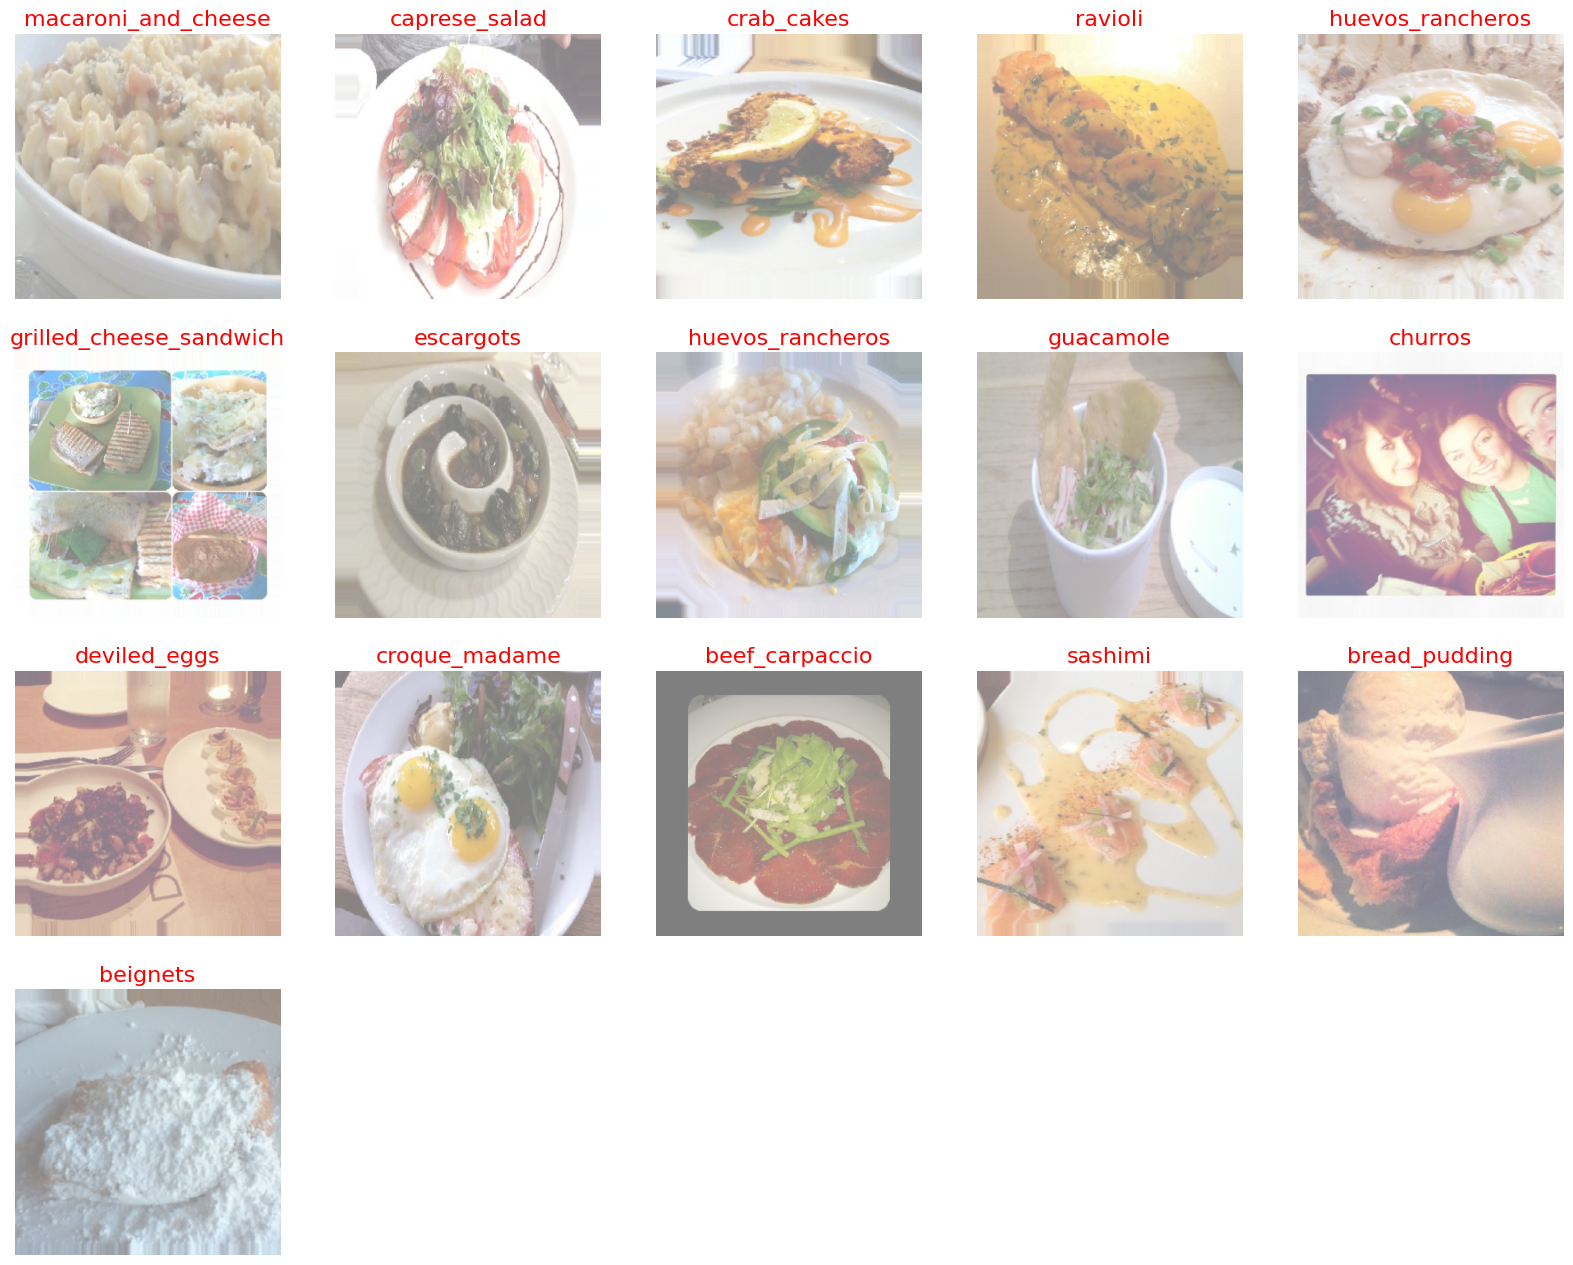

In [21]:
show_images(train)

In [22]:
from tensorflow.keras.applications import InceptionV3

inception = InceptionV3(weights="imagenet", include_top=False)

x = inception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)

predictions = Dense(
    101, kernel_regularizer=tf.keras.regularizers.l2(0.005), activation="softmax"
)(x)

model = tf.keras.Model(inputs=inception.input, outputs=predictions)

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 22,078,085 (84.22 MB)

 Trainable params: 22,043,653 (84.09 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_101class.keras", verbose=1, save_best_only=True
)
csv_logger = tf.keras.callbacks.CSVLogger("history_101class.log")

history = model.fit(
    train,
    steps_per_epoch=53025 // 16,
    validation_data=val,
    validation_steps=22725 // 16,
    epochs=30,
    verbose=2,
    callbacks=[csv_logger, checkpointer],
)

model.save("food_101_model.keras")

In [ ]:
model.evaluate(x=test, verbose=1)

In [ ]:
model.save("food_101_model.keras")

In [9]:
!ls /

bin	       etc		    lib     media  root		   srv	var
boot	       home		    lib32   mnt    run		   sys
dev	       install_packages.sh  lib64   opt    run_jupyter.sh  tmp
entrypoint.sh  kaggle		    libx32  proc   sbin		   usr


In [23]:
os.environ["KAGGLE_USERNAME"] = "ahmadfaraz00710"
os.environ["KAGGLE_KEY"] = ""  # key from the json file

In [24]:
!kaggle kernels output ahmadfaraz00710/food-101 -p /kaggle/working/

Output file downloaded to /kaggle/working/best_model_101class.keras
Output file downloaded to /kaggle/working/food_101_model.keras
Output file downloaded to /kaggle/working/history_101class.log
Kernel log downloaded to /kaggle/working/food-101.log 


In [25]:
from keras.models import load_model

model = load_model("/kaggle/working/food_101_model.keras")

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1721036808.383888     138 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-07-15 09:46:48.391953: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 4262s 3s/step


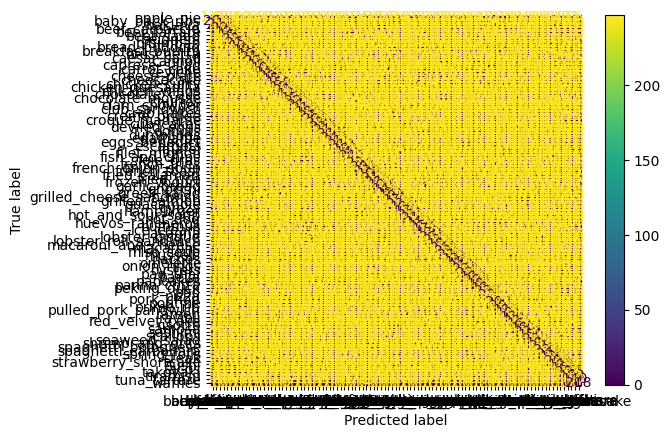

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(test)
pred = np.argmax(pred, axis=-1)

cm = confusion_matrix(y_true=test.classes, y_pred=pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()

In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 44,121,740 (168.31 MB)

 Trainable params: 22,043,653 (84.09 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 22,043,655 (84.09 MB)

In [28]:
model.evaluate(x=test, verbose=1)

1579/1579 ━━━━━━━━━━━━━━━━━━━━ 4243s 3s/step - accuracy: 0.7681 - loss: 1.2327


[1.1780579090118408, 0.7803564071655273]